By looking at the content on major sports news outlets, we can get an aggregate understanding of how social media websites are integrated with sports journalism.

Twitter in particular has established itself as the social media platform most associated with breaking news. Journalists often use Twitter to take their followers behind the scenes or to give their personal views and insights. Though this use evolved and was established by the behavior of individual journalists, it now is practically impossible for many journalists today to work without some sort of Twitter presence.

News orginizations themselves have embraced twitter. This is no different within the subfield of sports journalism. As we will see from analysis of three top sports reporting websites, the sports industry has embraced the remixibility and repurposeing described by the "Web 2.0" paradigm.

In this quantitative analysis of online sports news websites, I will be investigating and comparing the ways these websites integrate Twitter. I will be contrasting between three major sites: ESPN, Yahoo Sports, and Bleacher Report.

## ESPN

According to [Alexa](https://www.alexa.com/topsites/category/Sports), ESPN is the top sports website on the internet.

To demonstrate our method, I will quickly generate a list of the top words being used in current ESPN headlines.

In [1]:
import feedparser
espn_top = feedparser.parse('http://www.espn.com/espn/rss/news')

In [7]:
%pprint
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))

word_dict = {}
for title in [x['title'] for x in espn_top['entries']]:
    for word in title.split():
        if word.lower() in stopWords:
            continue
        if word not in word_dict:
            word_dict[word] = 1
        else:
            word_dict[word] += 1
[x[0] for x in sorted(word_dict.items(), key=lambda x: x[1], reverse=True) if x[1] >= 2]

Pretty printing has been turned OFF


['Week', 'win', "Fox's", 'takes', 'answer', 'complicated', 'Miami', 'Alabama', 'Case', 'Keenum', '--', 'dominates', 'defense', 'loss', 'best', '10', 'vs.', 'year', 'college', 'basketball', 'searching']

It looks like we are between "Week 10" and "Week 11" for the NFL. There also appears to be a lot of buzz around Alabama and Miani, which both have top-ranked football teams who played in big games the previous night.

Speaking of which, it is currently November. There are a lot of different sports in season right now including football, basketball, and hockey (the World Series also just finished up just a few weeks ago). We have a list of website links that ESPN has designated as their "top stories". ESPN categorizes their links by sport. What sports are being reported today in the most important stories?

Pretty printing has been turned OFF


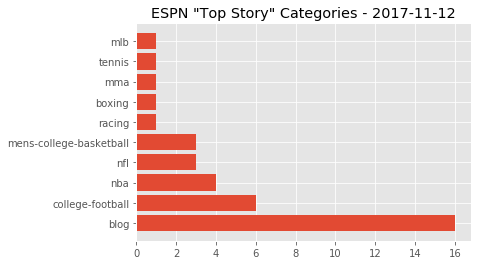

In [9]:
%pprint
import matplotlib.pyplot as plt
import numpy as np
import datetime

plt.style.use('ggplot')
links = [x['link'] for x in espn_top['entries']]
leagues = {}
for link in links:
    category = link[11:].split('/')[1]
    if category not in leagues:
        leagues[category] = 0
    leagues[category] += 1

items = sorted(leagues.items(), key=lambda x: x[1], reverse=True)[0:10]
pos = np.arange(len(items))
plt.barh(pos, [i[1] for i in items])
plt.yticks(pos, [i[0] for i in items])
plt.title('ESPN "Top Story" Categories - ' + datetime.datetime.now().strftime("%Y-%m-%d"))
plt.show()

The most common category is the "blog", which is not exactly the most descriptive. Otherwise, there appears to be a lot of variety in the sports covered in the top story section with no individual sport having more than six entries. This is one of the differences between ESPN's television news broadcasts and their website: while a television anchor can only realistically discuss one sport at a time and viewers would have to wait for their preferred sport, a website can present all sports at the same time and users can choose their preferred content.

What does "blog" actually mean on ESPN? We can take a peek at the specific "blog" categories being covered by looking at the next part of the URL.

In [11]:
[link[11:].split('/')[2] for link in links if link[11:].split('/')[1] == 'blog']

['pittsburgh-steelers', 'washington-redskins', 'new-orleans-saints', 'tennessee-titans', 'tampa-bay-buccaneers', 'detroit-lions', 'cleveland-browns', 'green-bay-packers', 'chicago', 'new-york', 'buffalo-bills', 'sec', 'ncfnation', 'big12', 'los-angeles-chargers', 'buster-olney']

Some articles get categorized under the blog header while others end up under the sections for their specific sport. We can see from these links that most of these blog entries are about specific NFL teams. In fact, sometimes very similar stories are posted in both places. Compare these two articles:

+ [Bears' ugly loss not Fox's best moment](http://www.espn.com/blog/chicago/bears/post/_/id/4706969/bears-ugly-loss-to-packers-not-john-foxs-best-moment)
+ [Fox's TD challenge results in Bears turnover](http://www.espn.com/nfl/story/_/id/21389373/john-fox-touchdown-challenge-results-turnover-chicago-bears)

The first link is posted under the `chicago` section of the blog, while the second link is in the `nfl` section. Both stories share an author, have the same video embedded at the top, and are about the same thing. The two articles, however, strike very different tones: the `nfl` article takes a more objective tone while the `blog` article is far more subjective.

- - -

We can use these links for a lot more than just looking at their structure. By loading each of the links from the RSS feed, we can understand ESPN's top stories as an aggregate. We would like to know how prominent a role Twitter plays on ESPN articles. One way we can find this out is by counting the number of Twitter links per article.

In [12]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlparse

def find_twitter(links, **kwargs):
    """
    Given a list of links, scrape each entry and return a list of lists containing
    Twitter links per page.
    """
    # This will contain a list of lists of links.
    twitter_links = []
    for link in links:
        page = requests.get(link)
        soup = BeautifulSoup(page.text, 'html.parser')
        if "divid" in kwargs:
            hrefs = soup.find(id=kwargs["divid"]).find_all('a')
        else:
            hrefs = soup.find_all('a')
        t_links = []
        for h in hrefs:
            l = h.get('href')
            if urlparse(l).netloc == 'twitter.com':
                t_links.append(l)
        twitter_links.append(t_links)
    return twitter_links

In [13]:
espn_twitter_links = find_twitter(links)

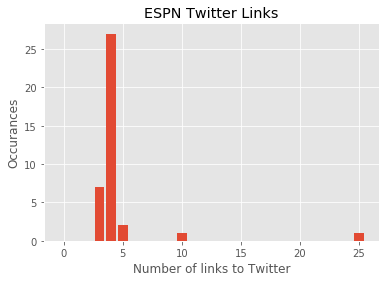

In [15]:
twitter_count = [len(l) for l in espn_twitter_links]
bins = np.bincount(twitter_count)
pos = np.arange(len(bins))
plt.bar(pos, bins)
plt.title('ESPN Twitter Links')
plt.ylabel('Occurances')
plt.xlabel('Number of links to Twitter')
plt.show()

Most ESPN pages have between three and five Twitter links, except for an outlier, which has twenty-five links. This particular article is titled ["Football fashion: Honoring veterans
"](http://www.espn.com/college-football/story/_/id/21365277/honoring-veterans-week-11) and it links to several tweets from universities showing pictures of college football helmets.

Using the structure of the Twitter URL, we can categorize the Twitter content linked on ESPN.

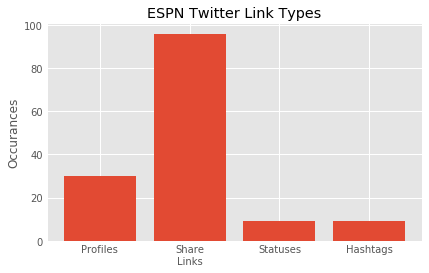

In [13]:
twitter_links = [item for sublist in espn_twitter_links for item in sublist]
profiles = sum(['screen_name' in x for x in twitter_links])
share_links = sum(['tweet?lang=en' in x for x in twitter_links])
embedded_tweets = sum(['status' in x for x in twitter_links])
hashtags = sum(['hashtag' in x for x in twitter_links])
profiles += len([x for x in twitter_links if 'screen_name' not in x and 'tweet?lang=en' not in x and 'status' not in x and 'hashtag' not in x])
pos = np.arange(4)
plt.bar(pos, [profiles, share_links, embedded_tweets, hashtags])
plt.xticks(pos, ["Profiles", "Share\nLinks", "Statuses", "Hashtags"])

plt.title('ESPN Twitter Link Types')
plt.ylabel('Occurances')
plt.show()

ESPN has at least two invitations to share articles via Twitter on each page, so it is not suprising to see these links making up the majority of links to Twitter on the site. They also commonly promote the accounts of their journalists, making up many of the profiles linked on the site. The hashtags come as a consequence of ESPN using embedding to display Tweets. Using this format, hashtags are automatically converted to links.

To understand how Twitter is being used as a source for content, let's zone in on those statuses. It is conventional in journalism to link to or embed a status when it is being referenced. Thus by looking at the number of statuses linked in each article, we can see how common it is for ESPN to use tweets as a source.

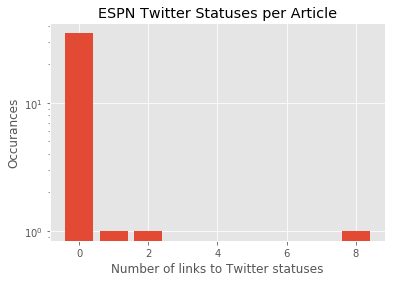

In [32]:
twitter_status_count = [sum('status' in x for x in l) for l in espn_twitter_links]
bins = np.bincount(twitter_status_count)
pos = np.arange(len(bins))
plt.bar(pos, bins)
plt.title('ESPN Twitter Statuses per Article')
plt.ylabel('Occurances')
plt.xlabel('Number of links to Twitter statuses')
plt.yscale('log')
plt.show()

While EPSN, uses Twitter extensively, they rarely seem to use it as a source on their "top stories". Its importance comes therefore from its ability to reach more people by being shared by readers and from its readers following their journalists.

## Yahoo Sports

Yahoo takes a more "Web 2.0" to its sports news. While most of their sports reporting is original, they also link to other websites in their RSS feeds and on their website. We can see which websites are most commonly distributed by Yahoo Sports by looking at these feeds.

In [22]:
yahoo_leagues = ["mlb", "nfl", "nba", "nhl", "nascar", "golf", "mma",
                 "boxing", "ncaab", "ncaaw", "ten", "ncaabb", "wnba",
                  "ncaaf", "oly", "irl", "sow", "mls", "ski", "sc", "rah"]

In [23]:
urls = []
yahoo_links = []
for league in yahoo_leagues:
    feed = feedparser.parse("https://sports.yahoo.com/{}/rss.xml".format(league))
    links = [x['link'] for x in feed['entries']]
    for link in links:
        yahoo_links.append(link)
        urls.append(urlparse(link).netloc)

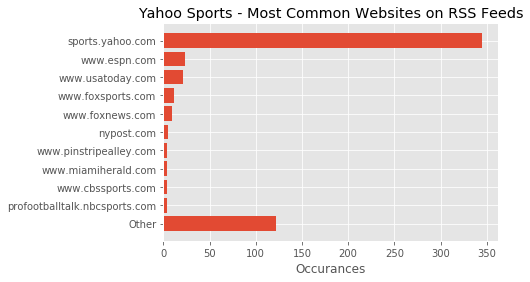

In [24]:
from collections import Counter
counter = Counter(urls)
n = 10
most_common = np.array(counter.most_common(n))
most_common = np.flip(most_common, 0)
other_count = len(yahoo_links) - np.sum(most_common[:,1].astype('int'))
oth = np.array([["Other", other_count]])
most_common = np.append(oth, most_common, axis=0)
pos = np.arange(len(most_common))
plt.barh(pos, most_common[:,1])
plt.yticks(pos, most_common[:,0])
plt.title('Yahoo Sports - Most Common Websites on RSS Feeds')
plt.xlabel('Occurances')
plt.show()

Here we can see the long tail in action. The majority of the links are for `sports.yahoo.com`; however Yahoo also pulls in content from over a hundred different websites. Thus when compared to ESPN, Yahoo serves more as an internet hub that combines both original and aggregated content.

Like ESPN, Yahoo Sports has integrated Twitter into their website. In addition to share buttons, Yahoo Sports often integrates links to Twitter within the text of their articles. If Yahoo is more of an aggregate, do they use Twitter as a source more often? We can do a query similar to the one we did above for ESPN.

In [25]:
yahoo_twitter_links = find_twitter([l for l in yahoo_links if 'sports.yahoo.com' in l])

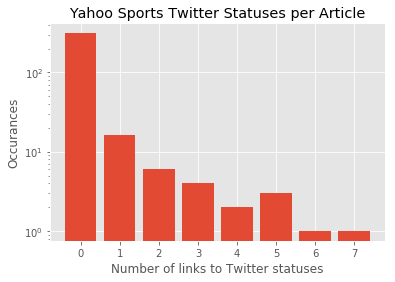

In [48]:
ytwitter_status_count = [sum('status' in x for x in l) for l in yahoo_twitter_links]
bins = np.bincount(ytwitter_status_count)
pos = np.arange(len(bins))
plt.bar(pos, bins)
plt.title('Yahoo Sports Twitter Statuses per Article')
plt.ylabel('Occurances')
plt.xlabel('Number of links to Twitter statuses')
plt.yscale('log')
plt.show()

Compared to ESPN, there is a lot more variety in terms of how many tweets use in content. The breakdown of what type of links are used, however, is very similar to that of ESPN.

*Note: Yahoo Sports uses JavaScript for their share links, which are not included here.*

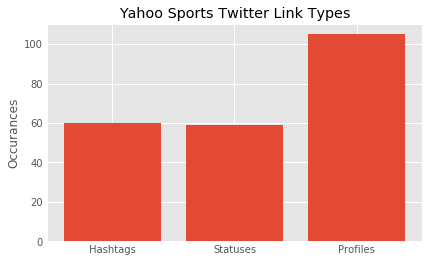

In [21]:
hashtags = sum(['hashtag' in x for x in twitter_links])
statuses = sum(['status' in x for x in twitter_links])
profiles = len(twitter_links) - sum([hashtags, statuses])
pos = np.arange(3)
plt.bar(pos, [hashtags, statuses, profiles])
plt.xticks(pos, ["Hashtags", "Statuses", "Profiles"])

plt.title('Yahoo Sports Twitter Link Types')
plt.ylabel('Occurances')
plt.show()

Like ESPN, Yahoo also uses promotes their journalists' Twitter accounts on articles.

In [37]:
import scipy.stats as stats
stats.mannwhitneyu(twitter_status_count, ytwitter_status_count)

MannwhitneyuResult(statistic=6456.0, pvalue=0.38192106006561477)

Overall, Yahoo Sporst and ESPN are very similar in their use of Twitter. In fact, the difference of frequency in tweets links between ESPN and Yahoo is statistically insignificant.

## Bleacher Report

While ESPN and Yahoo Sports both have roots in traditional sports reporting, Bleacher Report has very different origins. Initially, any user on the website could publish content. Although Bleacher Report has moved away from this ["content farm"](https://en.wikipedia.org/wiki/Content_farm) model since being acquired by Turner Broadcasting System, they still appear to rely less on original reporting and more on external sources compared to ESPN and Yahoo Sports.

In [38]:
br_feed = feedparser.parse('http://bleacherreport.com/articles/feed')

In [39]:
br_links = [x['link'] for x in br_feed['entries']]
br_twitter_links = find_twitter(br_links)

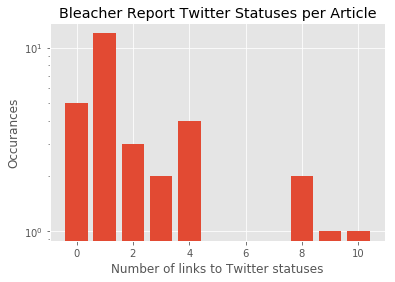

In [56]:
brtwitter_status_count = [sum('status' in x for x in l) for l in br_twitter_links]
bins = np.bincount(brtwitter_status_count)
pos = np.arange(len(bins))
plt.bar(pos, bins)
plt.title('Bleacher Report Twitter Statuses per Article')
plt.ylabel('Occurances')
plt.xlabel('Number of links to Twitter statuses')
plt.yscale('log')
plt.show()

The majority of Bleacher Report articles contain links to tweets. There is a statistically significant difference between the distribution of Twitter status links in articles when comparing Bleacher Report to ESPN and Yahoo Sports.

In [54]:
import scipy.stats as stats
print("BR/Yahoo, p={}".format(stats.mannwhitneyu(brtwitter_status_count, ytwitter_status_count)[1]))
print("BR/ESPN, p={}".format(stats.mannwhitneyu(brtwitter_status_count, twitter_status_count)[1]))

BR/Yahoo, p=3.3893768474293524e-27
BR/ESPN, p=1.6473706560911155e-09


Despite their move toward a more reputable image, it appears that Bleacher Report still has work to do if they want to appear more similar to these other outlets.

## Conclusions

From this analysis, we can see some different ways that sports journalists use Twitter. While Twitter can be used to share content, for journalists, it often also serves as a source for newsworthy content. Regardless of how often tweets are used as a source, all the media outlets analysed in this post link to the author's Twitter profile on articles, emphasizing the important role Twitter plays in a sports journalist's career.

- - -

*Want to perform this analysis yourself? Download our [Jupyter notebook](/quant.ipynb).*